<a href="https://colab.research.google.com/github/yeesem/Deep_Learning/blob/main/Multi_Class_Classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip

# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2024-04-11 04:36:52--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.123.207, 142.251.107.207, 74.125.196.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.123.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M   130MB/s    in 1.5s    

2024-04-11 04:36:54 (130 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2024-04-11 04:36:54--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.123.207, 142.251.107.207, 74.125.196.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.123.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-te

In [2]:
import zipfile

# Extract the archive
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = 'rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

base_dir  = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir,'paper')
scissor_dir = os.path.join(base_dir,'scissors')

print('Total training rock images    : ',len(os.listdir(rock_dir)))
print('Total training paper images   : ',len(os.listdir(paper_dir)))
print('Total training sciccor images : ',len(os.listdir(scissor_dir)))

rock_file_names = os.listdir(rock_dir)[:10]
print(rock_file_names)

paper_file_names = os.listdir(paper_dir)[:10]
print(paper_file_names)

scissor_file_names = os.listdir(scissor_dir)[:10]
print(scissor_file_names)

Total training rock images    :  840
Total training paper images   :  840
Total training sciccor images :  840
['rock01-002.png', 'rock05ck01-016.png', 'rock05ck01-098.png', 'rock04-054.png', 'rock03-006.png', 'rock07-k03-001.png', 'rock04-005.png', 'rock06ck02-091.png', 'rock03-059.png', 'rock05ck01-006.png']
['paper02-039.png', 'paper01-055.png', 'paper03-096.png', 'paper05-019.png', 'paper07-015.png', 'paper07-014.png', 'paper06-109.png', 'paper06-078.png', 'paper06-029.png', 'paper05-077.png']
['scissors01-006.png', 'scissors01-108.png', 'scissors03-070.png', 'scissors04-086.png', 'scissors03-069.png', 'scissors03-111.png', 'scissors01-034.png', 'scissors01-041.png', 'scissors01-014.png', 'testscissors02-007.png']


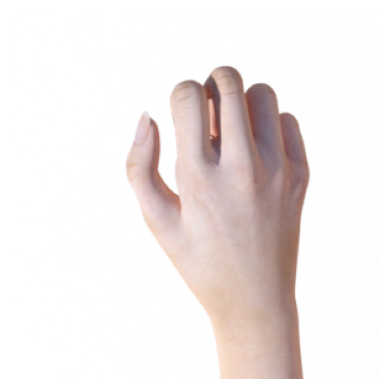

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir,fname)
            for fname in rock_file_names[pic_index - 2 : pic_index]]

next_paper = [os.path.join(paper_dir,fname)
             for fname in paper_file_names[pic_index - 2 : pic_index]]

next_scissor = [os.path.join(scissor_dir,fname)
               for fname in scissor_file_names[pic_index - 2 : pic_index]]


for i, img_path in enumerate(next_rock + next_paper + next_scissor):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [ ]:
# Build the model
import tensorflow as tf

model = tf.keras.models.Sequential([
    # First convolution
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Second convolution
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third convolution
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Fourth convolution
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(3,activation = 'softmax')
])

# Print the model summary
model.summary()

In [ ]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = 'tmp/rps-train/rps'
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

VALIDATION_DIR = 'rps-test-set'
validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size = 126,
    target_size = (150,150),
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size = 126,
    target_size = (150,150),
    class_mode = 'categorical'
)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs = 25,
    steps_per_epoch = 20,
    validation_data = validation_generator,
    validation_steps = 3,
    verbose = 1
)

In [ ]:
import matplotlib.pyplot plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot Training and validation accuracy graph
plt.plot(epochs,acc,'r',labels = 'Training loss')
plt.plot(epochs,val_acc,'b',labels = 'Validation accuracy')
plt.title('Training and validation accuracy')

# Plot Training and validation loss graph
plt.plot(epochs,loss,'r',labels = 'Training loss')
plt.plot(epochs,val_loss,'b',labels = 'Validation loss')
plt.title('Training and validation loss')

plt.legend()
plt.figure()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)